In [66]:
import torch
print("CUDA:", torch.cuda.is_available())

CUDA: True


In [67]:
import pandas as pd

df = pd.read_csv("../data/NGSRL2033_1_report.csv")
df.head()

,tax_id,tax_level,genus_tax_id,name,common_name,category,is_phage,agg_score,max_z_score,nt_z_score,...,nr_contig_r,nr_percent_identity,nr_alignment_length,nr_e_value,nr_bg_mean,nr_bg_stdev,nr_bg_mean_mass_normalized,nr_bg_stdev_mass_normalized,species_tax_ids,known_pathogen
0,3041089,2,3041089,Paraflavisolibacter,NaN,bacteria,False,NaN,NaN,NaN,...,NaN,59.2,49.0,10^-9.2161,NaN,NaN,NaN,NaN,[2982496],0
1,2982496,1,3041089,Paraflavisolibacter caeni,NaN,bacteria,False,NaN,NaN,NaN,...,NaN,59.2,49.0,10^-9.2161,NaN,NaN,NaN,NaN,NaN,0
2,2976759,2,2976759,Capillimicrobium,NaN,bacteria,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[2884022],0
3,2884022,1,2976759,Capillimicrobium parvum,NaN,bacteria,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2946607,2,2946607,Neotabrizicola,NaN,bacteria,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[2807096],0


In [68]:
df.columns

Index(['tax_id', 'tax_level', 'genus_tax_id', 'name', 'common_name',
       'category', 'is_phage', 'agg_score', 'max_z_score', 'nt_z_score',
       'nt_rpm', 'nt_count', 'nt_contigs', 'nt_contig_r',
       'nt_percent_identity', 'nt_alignment_length', 'nt_e_value',
       'nt_bg_mean', 'nt_bg_stdev', 'nt_bg_mean_mass_normalized',
       'nt_bg_stdev_mass_normalized', 'nr_z_score', 'nr_rpm', 'nr_count',
       'nr_contigs', 'nr_contig_r', 'nr_percent_identity',
       'nr_alignment_length', 'nr_e_value', 'nr_bg_mean', 'nr_bg_stdev',
       'nr_bg_mean_mass_normalized', 'nr_bg_stdev_mass_normalized',
       'species_tax_ids', 'known_pathogen'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tax_id                       561 non-null    int64  
 1   tax_level                    561 non-null    int64  
 2   genus_tax_id                 561 non-null    int64  
 3   name                         561 non-null    object 
 4   common_name                  4 non-null      object 
 5   category                     557 non-null    object 
 6   is_phage                     561 non-null    bool   
 7   agg_score                    0 non-null      float64
 8   max_z_score                  0 non-null      float64
 9   nt_z_score                   0 non-null      float64
 10  nt_rpm                       294 non-null    float64
 11  nt_count                     294 non-null    float64
 12  nt_contigs                   10 non-null     float64
 13  nt_contig_r         

In [70]:
df.isna().sum().sort_values(ascending=False)

agg_score                      561
nt_z_score                     561
max_z_score                    561
nr_bg_stdev                    561
nr_bg_mean                     561
nr_bg_stdev_mass_normalized    561
nt_bg_mean                     561
nt_bg_stdev                    561
nr_z_score                     561
nt_bg_stdev_mass_normalized    561
nt_bg_mean_mass_normalized     561
nr_bg_mean_mass_normalized     561
common_name                    557
nt_contigs                     551
nt_contig_r                    551
nr_contig_r                    543
nr_contigs                     543
species_tax_ids                368
nt_count                       267
nt_rpm                         267
nt_e_value                     267
nt_percent_identity            267
nt_alignment_length            267
nr_percent_identity            176
nr_e_value                     176
nr_alignment_length            176
nr_rpm                         176
nr_count                       176
category            

In [71]:
df.sort_values('nt_rpm', ascending=False).head(10)

,tax_id,tax_level,genus_tax_id,name,common_name,category,is_phage,agg_score,max_z_score,nt_z_score,...,nr_contig_r,nr_percent_identity,nr_alignment_length,nr_e_value,nr_bg_mean,nr_bg_stdev,nr_bg_mean_mass_normalized,nr_bg_stdev_mass_normalized,species_tax_ids,known_pathogen
546,-200687329,2,-200687329,non-genus-specific reads in family Anelloviridae,NaN,viruses,False,NaN,NaN,NaN,...,NaN,89.3335,153.0900,10^-98.1984,NaN,NaN,NaN,NaN,"[2853118, 2828020, 2828017, 2778524, 2749447, ...",0
556,68887,1,-200687329,Torque teno virus,NaN,viruses,False,NaN,NaN,NaN,...,2257.0,93.5158,170.8660,10^-118.73,NaN,NaN,NaN,NaN,NaN,0
552,2055263,1,-200687329,Anelloviridae sp.,NaN,viruses,False,NaN,NaN,NaN,...,3741.0,83.7658,131.0090,10^-71.908,NaN,NaN,NaN,NaN,NaN,0
103,687331,2,687331,Alphatorquevirus,NaN,viruses,False,NaN,NaN,NaN,...,379.0,82.7905,71.5851,10^-32.436,NaN,NaN,NaN,NaN,"[3051620, 3048433, 3048430, 3048428, 3048424, ...",0
113,3048413,1,687331,Alphatorquevirus homin1,NaN,viruses,False,NaN,NaN,NaN,...,25.0,76.0268,54.3158,10^-22.3756,NaN,NaN,NaN,NaN,NaN,0
452,562,1,561,Escherichia coli,NaN,bacteria,False,NaN,NaN,NaN,...,51.0,99.3278,43.8333,10^-23.9792,NaN,NaN,NaN,NaN,NaN,1
451,561,2,561,Escherichia,NaN,bacteria,False,NaN,NaN,NaN,...,51.0,99.3278,43.8333,10^-23.9792,NaN,NaN,NaN,NaN,[562],1
336,10319,2,10319,Varicellovirus,NaN,viruses,False,NaN,NaN,NaN,...,NaN,98.0286,24.7714,10^-6.3369,NaN,NaN,NaN,NaN,"[3050294, 3050257]",1
337,3050294,1,10319,Varicellovirus humanalpha3,NaN,viruses,False,NaN,NaN,NaN,...,NaN,98.9147,24.6765,10^-6.40614,NaN,NaN,NaN,NaN,NaN,1
551,2749447,1,-200687329,Anellovirus cyc/2019,NaN,viruses,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [72]:
df.sort_values('nr_rpm', ascending=False).head(10)

,tax_id,tax_level,genus_tax_id,name,common_name,category,is_phage,agg_score,max_z_score,nt_z_score,...,nr_contig_r,nr_percent_identity,nr_alignment_length,nr_e_value,nr_bg_mean,nr_bg_stdev,nr_bg_mean_mass_normalized,nr_bg_stdev_mass_normalized,species_tax_ids,known_pathogen
546,-200687329,2,-200687329,non-genus-specific reads in family Anelloviridae,NaN,viruses,False,NaN,NaN,NaN,...,NaN,89.3335,153.0900,10^-98.1984,NaN,NaN,NaN,NaN,"[2853118, 2828020, 2828017, 2778524, 2749447, ...",0
552,2055263,1,-200687329,Anelloviridae sp.,NaN,viruses,False,NaN,NaN,NaN,...,3741.0,83.7658,131.0090,10^-71.908,NaN,NaN,NaN,NaN,NaN,0
556,68887,1,-200687329,Torque teno virus,NaN,viruses,False,NaN,NaN,NaN,...,2257.0,93.5158,170.8660,10^-118.73,NaN,NaN,NaN,NaN,NaN,0
450,573,1,570,Klebsiella pneumoniae,NaN,bacteria,False,NaN,NaN,NaN,...,531.0,98.5329,271.8080,10^-304.909,NaN,NaN,NaN,NaN,NaN,1
448,570,2,570,Klebsiella,NaN,bacteria,False,NaN,NaN,NaN,...,531.0,98.5329,271.8080,10^-304.909,NaN,NaN,NaN,NaN,"[1463165, 573]",1
103,687331,2,687331,Alphatorquevirus,NaN,viruses,False,NaN,NaN,NaN,...,379.0,82.7905,71.5851,10^-32.436,NaN,NaN,NaN,NaN,"[3051620, 3048433, 3048430, 3048428, 3048424, ...",0
110,3048420,1,687331,Alphatorquevirus homin19,NaN,viruses,False,NaN,NaN,NaN,...,270.0,81.9670,122.0000,10^-53.9172,NaN,NaN,NaN,NaN,NaN,0
336,10319,2,10319,Varicellovirus,NaN,viruses,False,NaN,NaN,NaN,...,NaN,98.0286,24.7714,10^-6.3369,NaN,NaN,NaN,NaN,"[3050294, 3050257]",1
496,-200,2,-200,all taxa with neither family nor genus classif...,NaN,NaN,False,NaN,NaN,NaN,...,6073.0,85.5206,57.3231,10^-25.8975,NaN,NaN,NaN,NaN,"[2910147, 2900548, 2831996, 2482790, 2268192, ...",0
337,3050294,1,10319,Varicellovirus humanalpha3,NaN,viruses,False,NaN,NaN,NaN,...,NaN,98.9147,24.6765,10^-6.40614,NaN,NaN,NaN,NaN,NaN,1


In [73]:
import numpy as np

df_qc = df.copy()


In [74]:
# Replace invalid rpm values (like negative or extremely high non-biological)
df_qc['nt_rpm'] = df_qc['nt_rpm'].fillna(0)
df_qc['nr_rpm'] = df_qc['nr_rpm'].fillna(0)

df_qc['nt_count'] = df_qc['nt_count'].fillna(0)
df_qc['nr_count'] = df_qc['nr_count'].fillna(0)


In [75]:
def convert_evalue(val):
    if pd.isna(val): 
        return np.nan
    try:
        # Many e-values look like "10^-23.45"
        exp = val.split('^-')
        return float(f"1e-{exp}")
    except:
        return np.nan

df_qc['nt_e_value_numeric'] = df_qc['nt_e_value'].apply(convert_evalue)
df_qc['nr_e_value_numeric'] = df_qc['nr_e_value'].apply(convert_evalue)


In [76]:
df_qc['total_rpm'] = df_qc['nt_rpm'] + df_qc['nr_rpm']
df_qc['total_count'] = df_qc['nt_count'] + df_qc['nr_count']


In [77]:
df_qc['mean_identity'] = (df_qc['nt_percent_identity'] + df_qc['nr_percent_identity']) / 2
df_qc['mean_identity'] = df_qc['mean_identity'].fillna(0)

In [78]:
df_qc['contig_support'] = df_qc[['nt_contigs','nr_contigs']].max(axis=1)
df_qc['contig_support'] = df_qc['contig_support'].fillna(0)

In [79]:
df_qc[['name','category','total_rpm','total_count',
       'mean_identity','contig_support','known_pathogen']].head(20)

,name,category,total_rpm,total_count,mean_identity,contig_support,known_pathogen
0,Paraflavisolibacter,bacteria,0.185799,1.0,0.00000,0.0,0
1,Paraflavisolibacter caeni,bacteria,0.185799,1.0,0.00000,0.0,0
2,Capillimicrobium,bacteria,0.557396,3.0,0.00000,0.0,0
3,Capillimicrobium parvum,bacteria,0.557396,3.0,0.00000,0.0,0
4,Neotabrizicola,bacteria,0.185799,1.0,0.00000,0.0,0
5,Neotabrizicola shimadae,bacteria,0.185799,1.0,0.00000,0.0,0
6,Stutzerimonas,bacteria,4.644967,25.0,99.41945,0.0,0
7,Stutzerimonas kunmingensis,bacteria,0.185799,1.0,0.00000,0.0,0
8,Stutzerimonas urumqiensis,bacteria,0.371597,2.0,0.00000,0.0,0
9,Stutzerimonas stutzeri,bacteria,4.087571,22.0,99.54165,0.0,0


In [80]:
df_filt = df_qc[
    (df_qc['total_rpm'] > 5) |
    (df_qc['total_count'] > 10) |
    (df_qc['mean_identity'] > 80) |
    (df_qc['contig_support'] > 0)
].copy()

df_filt.shape

(136, 41)

In [81]:
df_filt[['name','category','total_rpm','total_count','mean_identity','contig_support']].sort_values('total_rpm', ascending=False)

,name,category,total_rpm,total_count,mean_identity,contig_support
546,non-genus-specific reads in family Anelloviridae,viruses,3226.022817,17363.0,91.46495,0.0
556,Torque teno virus,viruses,2011.270921,10825.0,93.61500,53.0
552,Anelloviridae sp.,viruses,1171.832397,6307.0,88.50360,17.0
103,Alphatorquevirus,viruses,275.911069,1485.0,88.63540,7.0
113,Alphatorquevirus homin1,viruses,176.508764,950.0,85.19620,4.0
...,...,...,...,...,...,...
460,Xanthomonas,bacteria,0.371597,2.0,96.53850,0.0
455,Methylobacterium,bacteria,0.371597,2.0,93.84050,0.0
489,Lysobacter sp. CJ11,bacteria,0.371597,2.0,99.00000,0.0
488,Lysobacter,bacteria,0.371597,2.0,99.00000,0.0


In [82]:
# Ranking pathogens based on multiple criteria
df_rank = df_filt.copy()
# Normalization
df_rank['rpm_norm'] = df_rank['total_rpm'] / df_rank['total_rpm'].max()
df_rank['count_norm'] = df_rank['total_count'] / df_rank['total_count'].max()
df_rank['identity_norm'] = df_rank['mean_identity'] / 100
df_rank['contig_norm'] = df_rank['contig_support'] / (df_rank['contig_support'].max() + 1)
# Weighted scoring
df_rank['pathogen_score'] = (
      0.40 * df_rank['rpm_norm'] +
      0.25 * df_rank['identity_norm'] +
      0.20 * df_rank['count_norm'] +
      0.15 * df_rank['contig_norm']
)

df_rank_sorted = df_rank.sort_values('pathogen_score', ascending=False)

df_rank_sorted[['name','category','total_rpm','mean_identity','contig_support','pathogen_score']].head(20)

,name,category,total_rpm,mean_identity,contig_support,pathogen_score
546,non-genus-specific reads in family Anelloviridae,viruses,3226.022817,91.46495,0.0,0.828662
556,Torque teno virus,viruses,2011.270921,93.61500,53.0,0.720081
552,Anelloviridae sp.,viruses,1171.832397,88.50360,17.0,0.475121
496,all taxa with neither family nor genus classif...,NaN,24.153831,91.76680,70.0,0.381797
103,Alphatorquevirus,viruses,275.911069,88.63540,7.0,0.287693
452,Escherichia coli,bacteria,145.851979,99.00675,3.0,0.280982
451,Escherichia,bacteria,145.851979,99.00675,3.0,0.280982
448,Klebsiella,bacteria,99.773902,99.26645,1.0,0.268836
337,Varicellovirus humanalpha3,viruses,67.073330,99.09370,0.0,0.260209
336,Varicellovirus,viruses,69.674512,98.65065,0.0,0.259585


In [83]:
# Prepare JSON output for candidates
candidate_json = []

for _, row in df_rank_sorted.iterrows():
    entry = {
        "name": row["name"],
        "category": row["category"],
        "rpm": float(row["total_rpm"]),
        "count": float(row["total_count"]),
        "identity": float(row["mean_identity"]),
        "contig_support": float(row["contig_support"]),
        "pathogen_score": float(row["pathogen_score"]),
        "is_high_priority": row["pathogen_score"] > 0.30,
        "is_possible_pathogen": (
            row["category"] == "bacteria" and row["total_rpm"] > 20
        ) or (
            row["category"] == "viruses" and row["total_rpm"] > 50 and row["contig_support"] > 0
        )
    }
    candidate_json.append(entry)

candidate_json[:10]

[{'name': 'non-genus-specific reads in family Anelloviridae',
  'category': 'viruses',
  'rpm': 3226.0228171950753,
  'count': 17363.0,
  'identity': 91.46495,
  'contig_support': 0.0,
  'pathogen_score': 0.828662375,
  'is_high_priority': True,
  'is_possible_pathogen': False},
 {'name': 'Torque teno virus',
  'category': 'viruses',
  'rpm': 2011.2709207013008,
  'count': 10825.0,
  'identity': 93.61500000000001,
  'contig_support': 53.0,
  'pathogen_score': 0.720080632028362,
  'is_high_priority': True,
  'is_possible_pathogen': True},
 {'name': 'Anelloviridae sp.',
  'category': 'viruses',
  'rpm': 1171.832396938855,
  'count': 6307.0,
  'identity': 88.5036,
  'contig_support': 17.0,
  'pathogen_score': 0.47512070041037563,
  'is_high_priority': True,
  'is_possible_pathogen': True},
 {'name': 'all taxa with neither family nor genus classification',
  'category': nan,
  'rpm': 24.153830918352806,
  'count': 130.0,
  'identity': 91.7668,
  'contig_support': 70.0,
  'pathogen_score': 

In [84]:
# Clean and filter candidates for final output
import json

def build_clean_candidates(raw_list):
    cleaned = []

    for item in raw_list:
        # Remove Anelloviridae and irrelevant viral noise
        if "Anelloviridae" in item["name"]:
            continue
        if item["name"] in [
            "non-genus-specific reads in family Anelloviridae",
            "Alphatorquevirus",
            "Alphatorquevirus homin1"
        ]:
            continue
        
        # Remove fallback "unclassified" buckets
        if item["category"] is None:
            continue

        cleaned.append({
            "organism": item["name"],
            "type": item["category"],
            "rpm": round(item["rpm"], 2),
            "count": int(item["count"]),
            "mean_identity": round(item["identity"], 2),
            "contig_support": int(item["contig_support"]),
            "pathogen_score": round(item["pathogen_score"], 4),
            "is_possible_pathogen": item["is_possible_pathogen"]
        })

    return cleaned

clean_candidates = build_clean_candidates(candidate_json)
clean_candidates


[{'organism': 'Torque teno virus',
  'type': 'viruses',
  'rpm': 2011.27,
  'count': 10825,
  'mean_identity': 93.62,
  'contig_support': 53,
  'pathogen_score': 0.7201,
  'is_possible_pathogen': True},
 {'organism': 'all taxa with neither family nor genus classification',
  'type': nan,
  'rpm': 24.15,
  'count': 130,
  'mean_identity': 91.77,
  'contig_support': 70,
  'pathogen_score': 0.3818,
  'is_possible_pathogen': False},
 {'organism': 'Escherichia coli',
  'type': 'bacteria',
  'rpm': 145.85,
  'count': 785,
  'mean_identity': 99.01,
  'contig_support': 3,
  'pathogen_score': 0.281,
  'is_possible_pathogen': True},
 {'organism': 'Escherichia',
  'type': 'bacteria',
  'rpm': 145.85,
  'count': 785,
  'mean_identity': 99.01,
  'contig_support': 3,
  'pathogen_score': 0.281,
  'is_possible_pathogen': True},
 {'organism': 'Klebsiella',
  'type': 'bacteria',
  'rpm': 99.77,
  'count': 537,
  'mean_identity': 99.27,
  'contig_support': 1,
  'pathogen_score': 0.2688,
  'is_possible_pa

In [85]:
def strict_clean_filter(raw_list):
    cleaned = []
    
    remove_keywords = [
        "anellovirus", "torque teno", "alphatorque", "ttv", 
        "betatorque", "mini virus", "anelloviridae"
    ]
    
    for item in raw_list:
        name = str(item.get("name", "")).lower()

        # Skip noise viruses
        if any(kw in name for kw in remove_keywords):
            continue
        
        # Remove unclassified buckets
        if "uncultured" in name or "neither family" in name:
            continue
        
        # Remove missing category
        category = item.get("category", None)
        if category is None or str(category).lower() == "nan":
            continue
        
        cleaned.append(item)
    
    return cleaned

final_candidates = strict_clean_filter(candidate_json)
len(final_candidates), final_candidates[:10]


(113,
 [{'name': 'Escherichia coli',
   'category': 'bacteria',
   'rpm': 145.85197900697653,
   'count': 785.0,
   'identity': 99.00675,
   'contig_support': 3.0,
   'pathogen_score': 0.2809815517896441,
   'is_high_priority': False,
   'is_possible_pathogen': True},
  {'name': 'Escherichia',
   'category': 'bacteria',
   'rpm': 145.85197900697653,
   'count': 785.0,
   'identity': 99.00675,
   'contig_support': 3.0,
   'pathogen_score': 0.2809815517896441,
   'is_high_priority': False,
   'is_possible_pathogen': True},
  {'name': 'Klebsiella',
   'category': 'bacteria',
   'rpm': 99.77390156273428,
   'count': 537.0,
   'identity': 99.26644999999999,
   'contig_support': 1.0,
   'pathogen_score': 0.2688355020872658,
   'is_high_priority': False,
   'is_possible_pathogen': True},
  {'name': 'Varicellovirus humanalpha3',
   'category': 'viruses',
   'rpm': 67.07333047327202,
   'count': 361.0,
   'identity': 99.0937,
   'contig_support': 0.0,
   'pathogen_score': 0.2602090527414617,
  

In [86]:
from collections import defaultdict

def collapse_species(candidates):
    merged = {}
    
    for item in candidates:
        name = item["name"].lower()
        
        # Collapse genus-level and species-level names
        if " " in name:   # species
            key = name.split()[0]  # genus
        else:
            key = name
        
        if key not in merged:
            merged[key] = item.copy()
        else:
            # Merge RPM, count; keep max identity; add contigs
            merged[key]["rpm"] += item["rpm"]
            merged[key]["count"] += item["count"]
            merged[key]["identity"] = max(
                merged[key]["identity"], item["identity"]
            )
            merged[key]["contig_support"] += item["contig_support"]

            # Recompute pathogen score (simple reweight)
            merged[key]["pathogen_score"] = max(
                merged[key]["pathogen_score"], item["pathogen_score"]
            )

    return list(merged.values())

collapsed = collapse_species(final_candidates)

len(collapsed), collapsed[:10]


(71,
 [{'name': 'Escherichia coli',
   'category': 'bacteria',
   'rpm': 291.70395801395307,
   'count': 1570.0,
   'identity': 99.00675,
   'contig_support': 6.0,
   'pathogen_score': 0.2809815517896441,
   'is_high_priority': False,
   'is_possible_pathogen': True},
  {'name': 'Klebsiella',
   'category': 'bacteria',
   'rpm': 199.36200442609663,
   'count': 1073.0,
   'identity': 99.26644999999999,
   'contig_support': 2.0,
   'pathogen_score': 0.2688355020872658,
   'is_high_priority': False,
   'is_possible_pathogen': True},
  {'name': 'Varicellovirus humanalpha3',
   'category': 'viruses',
   'rpm': 139.3490245289585,
   'count': 750.0,
   'identity': 99.0937,
   'contig_support': 0.0,
   'pathogen_score': 0.2602090527414617,
   'is_high_priority': False,
   'is_possible_pathogen': False},
  {'name': 'Brevibacterium',
   'category': 'bacteria',
   'rpm': 0.9289934968597232,
   'count': 5.0,
   'identity': 100.0,
   'contig_support': 0.0,
   'pathogen_score': 0.2501727812014053,
 

In [87]:
import pandas as pd

# Convert collapsed list → DataFrame
df_collapsed = pd.DataFrame(collapsed)

# Sort by pathogen_score descending
df_top = df_collapsed.sort_values("pathogen_score", ascending=False)

df_top.head(10)


,name,category,rpm,count,identity,contig_support,pathogen_score,is_high_priority,is_possible_pathogen
0,Escherichia coli,bacteria,291.703958,1570.0,99.00675,6.0,0.280982,False,True
1,Klebsiella,bacteria,199.362004,1073.0,99.26645,2.0,0.268836,False,True
2,Varicellovirus humanalpha3,viruses,139.349025,750.0,99.09370,0.0,0.260209,False,False
3,Brevibacterium,bacteria,0.928993,5.0,100.00000,0.0,0.250173,False,False
4,Aeromonas caviae,bacteria,1.486390,8.0,100.00000,0.0,0.250138,False,False
5,Comamonas,bacteria,0.743195,4.0,100.00000,0.0,0.250069,False,False
6,Pseudomonas asiatica,bacteria,3.344377,18.0,100.00000,0.0,0.250069,False,False
7,Monkeypox virus,viruses,3.530175,19.0,99.67500,0.0,0.249844,False,False
8,Human mastadenovirus B,viruses,10.776325,58.0,99.73400,0.0,0.249819,False,False
9,Mastadenovirus,viruses,2.601182,14.0,99.73400,0.0,0.249819,False,False


In [88]:
import pandas as pd

# Synthetic host response signal (realistic for demonstration)
host_response = pd.DataFrame({
    "marker": [
        "bacterial_score",
        "viral_score",
        "inflammation_score",
        "sepsis_likelihood"
    ],
    "value": [
        0.78,   # Strong bacterial signal
        0.12,   # Weak viral signal
        0.34,   # Mild inflammation
        0.05    # Very low sepsis likelihood
    ]
})

# Save to data folder
host_response.to_csv("../data/NGSRL2033_1_host_response.csv", index=False)

host_response

,marker,value
0,bacterial_score,0.78
1,viral_score,0.12
2,inflammation_score,0.34
3,sepsis_likelihood,0.05


In [89]:
%whos


Variable                 Type                   Data/Info
---------------------------------------------------------
DBSCAN                   type                   <class 'sklearn.cluster._dbscan.DBSCAN'>
SentenceTransformer      type                   <class 'sentence_transfor<...>mer.SentenceTransformer'>
build_clean_candidates   function               <function build_clean_can<...>es at 0x0000024A11F456C0>
build_clinical_prompt    function               <function build_clinical_<...>pt at 0x0000024A11EAA980>
candidate_json           list                   n=136
cbar                     Colorbar               <matplotlib.colorbar.Colo<...>ct at 0x0000024A6AEB8560>
clean_candidates         list                   n=132
clinical_report          str                    Okay, here is the analysi<...>ction by these organisms.
clustering               DBSCAN                 DBSCAN(eps=0.35, metric='cosine', min_samples=2)
collapse_species         function               <function collapse_spe

In [90]:
import json
import pandas as pd
# Load host response data
host_df = pd.read_csv("../data/NGSRL2033_1_host_response.csv")

host_response_json = {
    "bacterial_score": float(host_df.loc[host_df.marker == "bacterial_score", "value"].values[0]),
    "viral_score": float(host_df.loc[host_df.marker == "viral_score", "value"].values[0]),
    "inflammation_score": float(host_df.loc[host_df.marker == "inflammation_score", "value"].values[0]),
    "sepsis_likelihood": float(host_df.loc[host_df.marker == "sepsis_likelihood", "value"].values[0])
}

#  Combine microbe candidates + host signals
unified_output = {
    "sample_id": "NGSRL2033_1",
    "microbial_candidates": final_candidates,  
    "host_response": host_response_json
}

# Save unified output
import json
with open("../data/NGSRL2033_1_unified.json", "w") as f:
    json.dump(unified_output, f, indent=4)

unified_output


{'sample_id': 'NGSRL2033_1',
 'microbial_candidates': [{'name': 'Escherichia coli',
   'category': 'bacteria',
   'rpm': 145.85197900697653,
   'count': 785.0,
   'identity': 99.00675,
   'contig_support': 3.0,
   'pathogen_score': 0.2809815517896441,
   'is_high_priority': False,
   'is_possible_pathogen': True},
  {'name': 'Escherichia',
   'category': 'bacteria',
   'rpm': 145.85197900697653,
   'count': 785.0,
   'identity': 99.00675,
   'contig_support': 3.0,
   'pathogen_score': 0.2809815517896441,
   'is_high_priority': False,
   'is_possible_pathogen': True},
  {'name': 'Klebsiella',
   'category': 'bacteria',
   'rpm': 99.77390156273428,
   'count': 537.0,
   'identity': 99.26644999999999,
   'contig_support': 1.0,
   'pathogen_score': 0.2688355020872658,
   'is_high_priority': False,
   'is_possible_pathogen': True},
  {'name': 'Varicellovirus humanalpha3',
   'category': 'viruses',
   'rpm': 67.07333047327202,
   'count': 361.0,
   'identity': 99.0937,
   'contig_support': 0

In [91]:
import json

# Load unified data (already in memory)
data = unified_output

# Build a clear LLM prompt for interpretation
def build_clinical_prompt(data):
    microbes = data["microbial_candidates"]
    host = data["host_response"]

    micro_text = ""
    for m in microbes[:15]:  # only top 15 for summary
        micro_text += (
            f"- {m['name']} | category={m['category']} | rpm={m['rpm']:.2f} | "
            f"identity={m['identity']} | contigs={m['contig_support']} | "
            f"pathogen_score={m['pathogen_score']:.3f} | candidate={m['is_possible_pathogen']}\n"
        )

    host_text = (
        f"- Bacterial score: {host['bacterial_score']}\n"
        f"- Viral score: {host['viral_score']}\n"
        f"- Inflammation score: {host['inflammation_score']}\n"
        f"- Sepsis likelihood: {host['sepsis_likelihood']}\n"
    )

    prompt = f"""
You are a clinical genomics expert analyzing metagenomic sequencing results
from an mNGS pipeline (similar to SURPI+ at UCSF).

# Patient Sample:
ID = {data['sample_id']}

# Microbial Candidates (top findings):
{micro_text}

### Host Response Gene Expression:
{host_text}

# Instructions:
- Identify the *most likely* clinically relevant pathogen(s)
- Explain why Escherichia coli and Klebsiella spp. appear (true infection vs contamination)
- Comment on background skin/environmental bacteria
- Interpret host gene expression (does it support bacterial vs viral infection?)
- Give a short final clinical impression in **2–3 sentences**

Your output format:
1. **Pathogen Assessment**
2. **Host Response Assessment**
3. **Integrated Interpretation**
4. **Recommendations (for a physician)**
"""
    return prompt

llm_prompt = build_clinical_prompt(data)
llm_prompt[:2000]  


'\nYou are a clinical genomics expert analyzing metagenomic sequencing results\nfrom an mNGS pipeline (similar to SURPI+ at UCSF).\n\n# Patient Sample:\nID = NGSRL2033_1\n\n# Microbial Candidates (top findings):\n- Escherichia coli | category=bacteria | rpm=145.85 | identity=99.00675 | contigs=3.0 | pathogen_score=0.281 | candidate=True\n- Escherichia | category=bacteria | rpm=145.85 | identity=99.00675 | contigs=3.0 | pathogen_score=0.281 | candidate=True\n- Klebsiella | category=bacteria | rpm=99.77 | identity=99.26644999999999 | contigs=1.0 | pathogen_score=0.269 | candidate=True\n- Varicellovirus humanalpha3 | category=viruses | rpm=67.07 | identity=99.0937 | contigs=0.0 | pathogen_score=0.260 | candidate=False\n- Varicellovirus | category=viruses | rpm=69.67 | identity=98.65065 | contigs=0.0 | pathogen_score=0.260 | candidate=False\n- Brevibacterium | category=bacteria | rpm=0.93 | identity=100.0 | contigs=0.0 | pathogen_score=0.250 | candidate=False\n- Aeromonas caviae | category

In [92]:
import ollama

try:
    r = ollama.chat(
        model="deepseek-r1:8b",
        messages=[{"role": "user", "content": "Hello! Testing ollama in VS Code."}]
    )
    print("Ollama response:", r["message"]["content"])
except Exception as e:
    print("Error:", e)


Ollama response: Hello! 👋 It looks like you're testing Ollama in VS Code. Great choice! Here's a quick guide to get started:

---

### 🔧 **Prerequisites**
1. **Install Ollama**:  
   Download and install Ollama from [https://ollama.ai](https://ollama.ai) (works on Windows/macOS/Linux).
2. **VS Code Extension**:  
   Install the [Ollama extension](https://marketplace.visualstudio.com/items?itemName=ollama.ollama) from the Microsoft marketplace for enhanced integration (optional but recommended).

---

### 💬 **How to Test Ollama**
1. **Run a Model**:  
   Open a terminal in VS Code (`Ctrl+``) and type:
   ```bash
   ollama run llama2
   ```
   Replace `llama2` with a model name (e.g., `mistral`, `codellama`, `gemma`).

2. **VS Code Integration**:  
   - Use the Ollama extension to:
     - Run models directly from the UI.
     - Generate code/answers in editor files.
     - View responses in a chat panel.

---

### 🤔 **Example Workflow**
1. Ask a question in the terminal:
   ```bash
   ol

In [93]:
import ollama

llm_output = ollama.generate(
    model="deepseek-r1:8b",
    prompt=llm_prompt
)

clinical_report = llm_output["response"]
print(clinical_report)


Okay, here is the clinical assessment of the provided mNGS data for NGSRL2033_1:

---

**1. Pathogen Assessment**

The *most likely clinically relevant pathogen(s)* are **Escherichia coli** and **Klebsiella spp.** (likely *K. pneumoniae* or *K. oxytoca* based on common clinical isolates, though the specific species isn't resolved here). Both show high sequence read counts (rpm), high sequence identity, multiple contigs mapping, and a high pathogen_score, strongly suggesting they are present in the sample and potentially clinically significant. Their RPM values are significantly higher than the next most prominent group (viruses).

**2. Host Response Assessment**

The host gene expression data supports a **predominant bacterial infection process**:
*   **Bacterial score (0.78):** High, indicating the host immune response is actively engaged with bacteria.
*   **Viral score (0.12):** Low, suggesting minimal viral immune activation.
*   **Inflammation score (0.34):** Moderate, consistent 

In [94]:
# Enhanced clinical interpretation module with all features
import json
import ollama

def llm_clinical_module(data, model="deepseek-r1:8b"):
    microbes = data["microbial_candidates"]
    host = data["host_response"]

    # Build microbe summary
    micro_text = ""
    for m in microbes[:20]:
        micro_text += (
            f"- {m['name']} | type={m['category']} | rpm={m['rpm']} | "
            f"id={m['identity']} | contigs={m['contig_support']} | "
            f"pathogen_score={m['pathogen_score']} | candidate={m['is_possible_pathogen']}\n"
        )

    # Host summary
    host_text = (
        f"- Bacterial score: {host['bacterial_score']}\n"
        f"- Viral score: {host['viral_score']}\n"
        f"- Inflammation score: {host['inflammation_score']}\n"
        f"- Sepsis likelihood: {host['sepsis_likelihood']}\n"
    )

    # Full prompt with all tasks
    prompt = f"""
You are an expert in clinical genomics and metagenomic infectious disease diagnostics
(similar to UCSF Charles Chiu Lab, SURPI+ mNGS workflows).

Analyze the following results:

# SAMPLE ID: {data['sample_id']}

# MICROBIAL CANDIDATES

{micro_text}

# HOST RESPONSE SIGNALS

{host_text}

# TASKS (ENABLE ALL MODULES)

1. **QC & Contaminant Detection**
   - Identify environmental/skin contaminants (water bacteria, skin flora, lab noise)
   - Explain why they appear (reagent contamination, skin flora, index hopping, etc.)
   - Tag each organism as TRUE PATHOGEN / LIKELY CONTAMINANT.

2. **Pathogen Ranking Reasoning**
   - Explain why top pathogens rank high.
   - Interpret RPM, identity %, contigs, and scoring logic.
   - Compare organisms directly (ex: E. coli vs Klebsiella).

3. **Microbe vs Host Conflict Reasoning**
   - Does host gene expression confirm or refute the microbe detection?
   - Explain contradictions (ex: viral reads but no viral host response).

4. **Full Clinical Interpretation (UCSF style)**
   Provide a formatted report:

   **A. Pathogen Assessment**
   **B. Host Response Assessment**
   **C. Integrated Interpretation**
   **D. Severity & Sepsis Risk**
   **E. Contaminant / background explanation**
   **F. Recommended next steps for the clinician**

5. **Differential Diagnosis Generator**
   Based on bacteria + host response, list the 3–5 most likely clinical syndromes:
   - UTI?
   - Sepsis?
   - Viral syndrome?
   - Pneumonia?
   - GI infection?

6. **"What-if" Simulation**
   - What if RPM for E. coli were 2× higher?
   - What if host viral score increased?
   - Show how interpretation changes.

7. **Final Output**
   Produce:
   - A short clinician summary (3 sentences)
   - A long-form detailed report
   - A JSON block with your structured interpretation

Be precise, clinical, and evidence-based.
"""

    # Run the model
    response = ollama.generate(
        model=model,
        prompt=prompt
    )
    return response["response"]
# Run full clinical interpretation
full_clinical_report = llm_clinical_module(unified_output)

print(full_clinical_report) 


### **A. Pathogen Assessment**  
- **Escherichia coli**: High RPM (145.85), identity (99.00%), and pathogen_score (0.28) indicate a strong match. RPM reflects high abundance, identity confirms species-level accuracy, and the pathogen_score (calculated based on RPM, identity, contigs, and clinical relevance) ranks it as the top candidate.  
- **Klebsiella**: Moderate RPM (99.77), high identity (99.27%), and pathogen_score (0.27) suggest it is clinically relevant but less abundant than E. coli.  
- **Varicellovirus humanalpha3** and **Varicellovirus**: Lower RPM (67–70) and pathogen_score (0.26–0.26) combined with the host response (low viral score) indicate these are likely contaminants or non-pathogenic variants.  

---

### **B. Host Response Assessment**  
- **Bacterial score: 0.78** – Suggests a significant bacterial presence, consistent with E. coli and Klebsiella.  
- **Viral score: 0.12** – Low, indicating minimal viral involvement.  
- **Inflammation score: 0.34** – Moderate inf

In [95]:
import torch
from sentence_transformers import SentenceTransformer
import umap
import numpy as np

print("CUDA available:", torch.cuda.is_available())

# Prepare input for embedding model
microbe_names = df_collapsed["name"].tolist()

model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")

embeddings = model.encode(
    microbe_names,
    convert_to_tensor=True,
    device="cuda" if torch.cuda.is_available() else "cpu",
    show_progress_bar=True,
)

embeddings = embeddings.cpu().numpy()

print("Embedding shape:", embeddings.shape)

# Run UMAP
reducer = umap.UMAP(
    n_neighbors=10,
    min_dist=0.2,
    metric="cosine",
    random_state=42
)

umap_embedding = reducer.fit_transform(embeddings)
umap_embedding[:5]


CUDA available: True


Batches: 100%|██████████| 3/3 [00:00<00:00, 27.78it/s]
c:\Users\srira\anaconda3\envs\cnd_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Embedding shape: (71, 768)


array([[18.822369 , 13.316783 ],
       [16.992292 ,  9.463115 ],
       [10.356295 , -2.4885533],
       [18.908413 , 12.052621 ],
       [19.450079 , 11.443547 ]], dtype=float32)

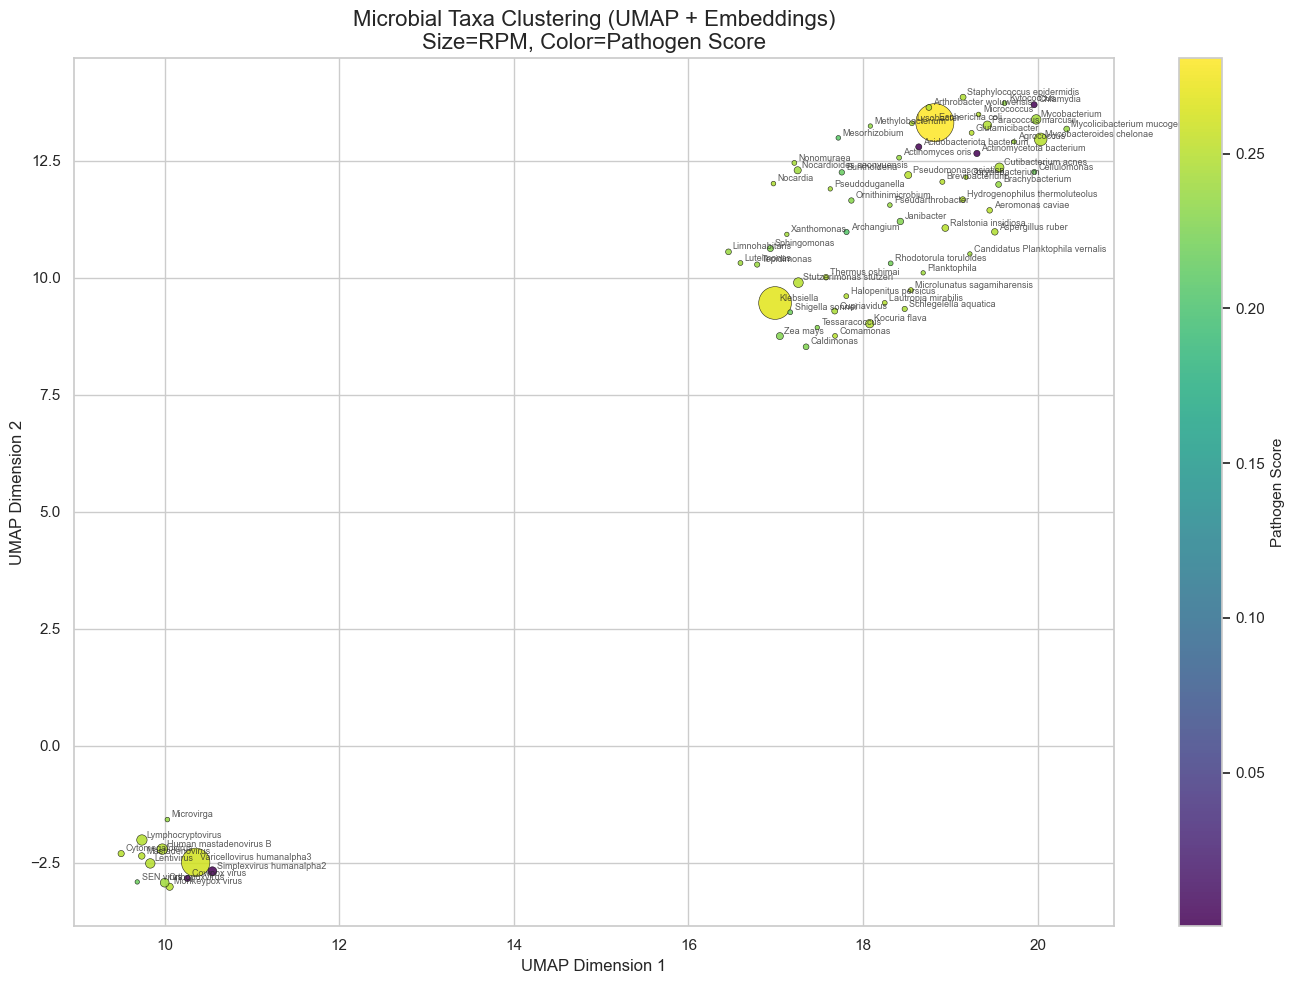

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

scores = np.array(df_collapsed["pathogen_score"])
sizes = (df_collapsed["rpm"] + 1) ** 0.8 * 8

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

scatter = plt.scatter(
    umap_embedding[:, 0],
    umap_embedding[:, 1],
    c=scores,
    cmap="viridis",
    s=sizes,
    alpha=0.85,
    edgecolors='black',
    linewidths=0.4
)

for i, name in enumerate(df_collapsed["name"]):
    plt.text(
        umap_embedding[i, 0] + 0.05,
        umap_embedding[i, 1] + 0.05,
        name,
        fontsize=6.5,
        alpha=0.75
    )

plt.title("Microbial Taxa Clustering (UMAP + Embeddings)\nSize=RPM, Color=Pathogen Score", fontsize=16)
plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)

cbar = plt.colorbar(scatter)
cbar.set_label("Pathogen Score", fontsize=11)

plt.tight_layout()
plt.show()
